<a href="https://colab.research.google.com/github/LubangaD/groupwork/blob/main/169240_D_Lubanga_DSA8203_CAT1ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAME**: *DERRICK* *LUBANGA*<br>
**REG NUMBER** *169240*<br>
**TASK** *CAT 1 and Homework Continuation.*<br>

The main  Objective is to use data science techniques to uncover insights and design solutions related to the job market in Ivory coast IT sector, specifically focusing on youth employment (15-35 years).

In [ ]:
#Include libraries to be used
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px


In [ ]:
# !pip install -U pandas-profiling

In [ ]:
#Import datasets Unemployment dataset and population dataset.
df = pd.read_csv("https://raw.githubusercontent.com/LubangaD/169240/main/unemployment.csv")
population_df = pd.read_excel('https://github.com/LubangaD/169240/raw/main/Population.xlsx', engine='openpyxl')


In [ ]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Display the list of numeric columns
print("Numeric Columns:")
print(numeric_columns)

Numeric Columns:
Index(['time', 'obs_value'], dtype='object')


1. ***Is there an example of an outlier in your data that surprised you? Yes Why? the above plot is of the numeric variable the observed value and from the distribution we can see many outliers which is what surprised me.***

This data has alot of outliers as the Outliers as Individual points beyond the whiskers are  plotted individually. This may suggest potential anomalies or extreme values in the dataset.

In [ ]:
df.isnull().sum()

ref_area.label          0
indicator.label         0
source.label            0
sex.label               0
classif1.label          0
time                    0
obs_value               0
obs_status.label    18388
dtype: int64

In [ ]:
# Specify the column for the histogram
#col_name = 'obs_value'
#plt.figure(figsize=(8, 6))
#sns.histplot(df[col_name], bins=20, kde=True)
# Set title and labels
#plt.title('Histogram - {}'.format(col_name), fontsize=14)
#plt.xlabel(col_name, fontsize=12)
#plt.ylabel('Frequency', fontsize=12)

# Show the plot
#plt.show()

**2.Look at some of the histograms for your data? How would you explain one of them to someone who is not familiar with your data?** Our data is skewed to the right, which means that there are more data points concentrated on the lower values, and the distribution tail extends towards the higher values. In other words, the majority of the observations in the dataset are on the left side of the histogram, and there are relatively fewer instances of higher values.

This type of skewness can be indicative of certain characteristics in the data. For example, it might suggest that there are a few observations with very high values that are pulling the average (mean) towards the right.

This data has a right skeweness

When data is skewed to the right, it means that the mean is less than the median.Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean.A large number of data values occur on the left side with a fewer number of data values on the right side

In [ ]:
# Rename columns
df = df.rename(columns={
    'ref_area.label': 'country',
    'indicator.label': 'indicator',
    'source.label': 'source',
    'sex.label': 'sex',
    'classif1.label': 'classification',
    'time': 'year',
    'obs_value': 'observed value',
    'obs_status.label': 'status'
})

# Display the modified DataFrame
df.head()

,country,indicator,source,sex,classification,year,observed value,status
0,Afghanistan,Unemployment rate by sex and age -- ILO modell...,ILO - Modelled Estimates,Sex: Total,"Age (Youth, adults): 15+",2020,11.710,Real value
1,Afghanistan,Unemployment rate by sex and age -- ILO modell...,ILO - Modelled Estimates,Sex: Total,"Age (Youth, adults): 15-24",2020,16.053,Real value
2,Afghanistan,Unemployment rate by sex and age -- ILO modell...,ILO - Modelled Estimates,Sex: Total,"Age (Youth, adults): 25+",2020,9.695,Real value
3,Afghanistan,Unemployment rate by sex and age -- ILO modell...,ILO - Modelled Estimates,Sex: Male,"Age (Youth, adults): 15+",2020,10.458,Real value
4,Afghanistan,Unemployment rate by sex and age -- ILO modell...,ILO - Modelled Estimates,Sex: Male,"Age (Youth, adults): 15-24",2020,14.452,Real value


In [ ]:
# Filter data for Côte d'Ivoire
df2 = df[df['country'] == "Côte d'Ivoire"]

In [ ]:
# Create a line chart using Plotly Express
average_observed_value = df2.groupby('year')['observed value'].mean().reset_index()
fig = px.line(average_observed_value, x="year", y="observed value", title='Average Observed Value Over Years - Côte d\'Ivoire',
              labels={'observed value': 'Average Observed Value', 'year': 'Year'})


fig.update_layout(xaxis_title_font=dict(size=14), yaxis_title_font=dict(size=14))
fig.show()


**Classifying the ages and sex**

In [ ]:
ivorycoast = df2[df2['classification'].isin(['Age (Youth, adults): 15-24', 'Age (Youth, adults): 25+'])]
ivorycoast = ivorycoast[ivorycoast['sex'].isin(['Sex: Male','Sex: Female'])]


In [ ]:
ivorycoast['classification'].unique()

array(['Age (Youth, adults): 15-24', 'Age (Youth, adults): 25+'],
      dtype=object)

In [ ]:
ivorycoast['classification'] = ivorycoast['classification'].replace({'Age (Youth, adults): 25+':'25-35','Age (Youth, adults): 15-24':'15-24'}, regex=False).str.strip()
ivorycoast['sex'] = ivorycoast['sex'].replace({'Sex: Male':'male','Sex: Female':'female'},regex=False).str.strip()


In [ ]:
ivorycoast_df= ivorycoast
ivorycoast_df.head()

,country,indicator,source,sex,classification,year,observed value,status
3145,Côte d'Ivoire,Unemployment rate by sex and age -- ILO modell...,ILO - Modelled Estimates,male,15-24,2023,3.384,NaN
3146,Côte d'Ivoire,Unemployment rate by sex and age -- ILO modell...,ILO - Modelled Estimates,male,25-35,2023,1.734,NaN
3148,Côte d'Ivoire,Unemployment rate by sex and age -- ILO modell...,ILO - Modelled Estimates,female,15-24,2023,5.153,NaN
3149,Côte d'Ivoire,Unemployment rate by sex and age -- ILO modell...,ILO - Modelled Estimates,female,25-35,2023,2.685,NaN
3154,Côte d'Ivoire,Unemployment rate by sex and age -- ILO modell...,ILO - Modelled Estimates,male,15-24,2022,3.396,NaN


In [ ]:
ivorycoast_df.columns

Index(['country', 'indicator', 'source', 'sex', 'classification', 'year',
       'observed value', 'status'],
      dtype='object')

In [ ]:
ivorycoast_df.isnull().sum()

country            0
indicator          0
source             0
sex                0
classification     0
year               0
observed value     0
status            28
dtype: int64

In [ ]:
ivorycoast_df = ivorycoast_df.drop('status', axis=1)

**3.What cleanup was required in your dataset?** changing of column names, extracting of relevant information from different columns and adding them to new columns example the sex, classification of ages into groups.Filtering to get Ivory Coast data.**Determine how to handle the missing values for your dataset.** Dropped the column that had largest missing values which indicates possibility that data was not recorded fot that column.


**Explain how two of the issues raised in this video may impact the dataset from your assigned country.** (200 words)
**Data Quality** and **Data literacy**


Data quality plays a pivotal role in decision-making, particularly in the context of columns such as 'country,' 'indicator,' 'source,' 'sex,' 'classification,' 'year,' and 'observed value' when assessing unemployment rates among youth. Inaccurate or incomplete data in the 'country' column can lead to misguided policy decisions, as each nation has unique socioeconomic factors. 'Indicator,' 'source,' and 'classification' columns influence decision-making by shaping the understanding of the nature and reliability of the data. 'Sex' and 'year' columns are critical for identifying trends and gender-specific patterns over time. The 'observed value,' representing a percentage of total population for unemployed youth, is fundamental for formulating targeted interventions. Additionally, data literacy, understanding the data's context and limitations, is essential for stakeholders to make informed decisions and mitigate the impact of unreliable information on policy formulation and implementation.Informed decision-making relies on an intricate understanding of data quality, emphasizing the importance of accurate, comprehensive, and contextually aware information in navigating the complexities of youth unemployment and facilitating effective policy responses.

# **We start analysing population dataset**<br>
# ***2.This part also marks the beginning of my homework assignment***




**1. What sort of issues are there in your data? What cleanup was required?**



1.   Understanding the data interms of the variables and meaning. How can I use the metrics to come up with meaning analysis
2.   Column Renaming

3. Filtering Data for Côte d'Ivoire

4. Standardization of Classification and Sex Labels: standardizing the labels for classification and sex to a consistent format.

5. Selection of Relevant Columns

6. Selection of Ivory Coast Data from the Population Dataset

7. Pivoting Population Data: It pivots the population dataset to convert it into a long format for merging with the unemployment dataset.

8. Merging Datasets

9. Calculation of Total Unemployed Population

10. Column Renaming After Merge: It renames the columns resulting from the merge operation for clarity.

11. Calculation of Average Unemployed Population: I calculated the average of the total unemployed population for each year.



# The above steps are shown in the codes that proceed as well as the function that cleans the dataset.

In [ ]:
population_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,567892149.0,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0


In [ ]:
# Select only ivorycoast data from the population dataset
ivorycoast_pop = population_df[population_df['Country Code'] == 'CIV']
population_df= pd.DataFrame(ivorycoast_pop)
population_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
41,Cote d'Ivoire,CIV,"Population, total",SP.POP.TOTL,3708661.0,3848336.0,3998287.0,4156453.0,4321368.0,4492890.0,...,22469268.0,22995555.0,23596741.0,24213622.0,24848016.0,25493988.0,26147551.0,26811790.0,27478249.0,28160542.0


In [ ]:
# Perform pivoting
finalp_df = population_df.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                    var_name='Year', value_name='Totalpop')

# Print the first few rows of the melted DataFrame
finalp_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Totalpop
0,Cote d'Ivoire,CIV,"Population, total",SP.POP.TOTL,1960,3708661.0
1,Cote d'Ivoire,CIV,"Population, total",SP.POP.TOTL,1961,3848336.0
2,Cote d'Ivoire,CIV,"Population, total",SP.POP.TOTL,1962,3998287.0
3,Cote d'Ivoire,CIV,"Population, total",SP.POP.TOTL,1963,4156453.0
4,Cote d'Ivoire,CIV,"Population, total",SP.POP.TOTL,1964,4321368.0


**Lets plot to see the trend in population**

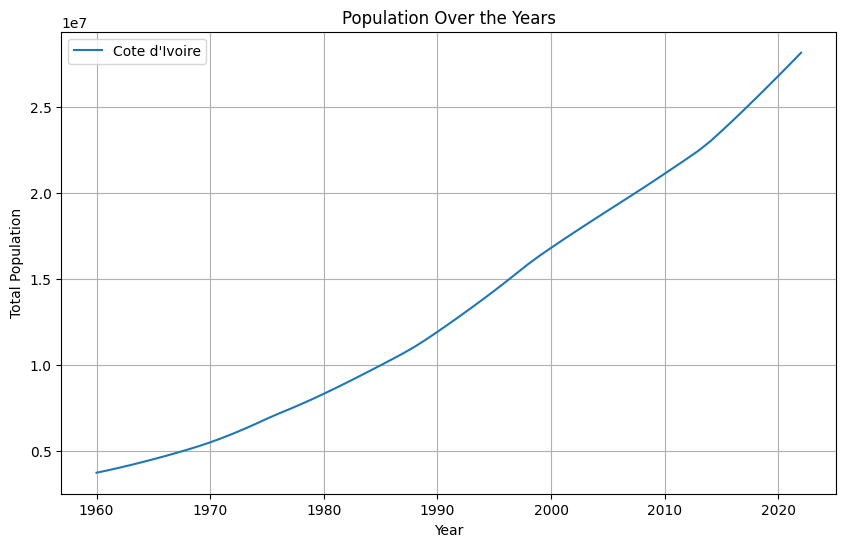

In [ ]:
# Convert 'Year' to numeric type
finalp_df['Year'] = pd.to_numeric(finalp_df['Year'])

# Plotting
plt.figure(figsize=(10, 6))
for country, data in finalp_df.groupby('Country Name'):
    plt.plot(data['Year'], data['Totalpop'], label=country)

plt.title('Population Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
finalp_df.isnull().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
Year              0
Totalpop          0
dtype: int64

*The dataset is clean no null values we can now cobine the two datasets and see the trends of unemployment with regards to population*

In [ ]:
#Rename columns to make merging easy
ivorycoast_df.rename(columns={'country': 'Country Name', 'year':'Year'}, inplace=True)

In [ ]:
# Merge the dataframes on 'Country Name' and 'Year'
merged_df = pd.merge(ivorycoast_df, finalp_df, on=[ 'Year'], how='inner')

# Perform the multiplication and create the new column 'totalunemployedp'
merged_df['totalunemployedp'] = merged_df['observed value'] * merged_df['Totalpop']

In [ ]:
merged_df.columns

Index(['Country Name_x', 'indicator', 'source', 'sex', 'classification',
       'Year', 'observed value', 'Country Name_y', 'Country Code',
       'Indicator Name', 'Indicator Code', 'Totalpop', 'totalunemployedp'],
      dtype='object')

In [ ]:
merged_df.rename(columns={'Country Name_x': 'Country Name', 'Country Name_y':'Country Name'}, inplace=True)
merged_df.head(1)

,Country Name,indicator,source,sex,classification,Year,observed value,Country Name,Country Code,Indicator Name,Indicator Code,Totalpop,totalunemployedp
0,Côte d'Ivoire,Unemployment rate by sex and age -- ILO modell...,ILO - Modelled Estimates,male,15-24,2022,3.396,Cote d'Ivoire,CIV,"Population, total",SP.POP.TOTL,28160542.0,9.563320e+07


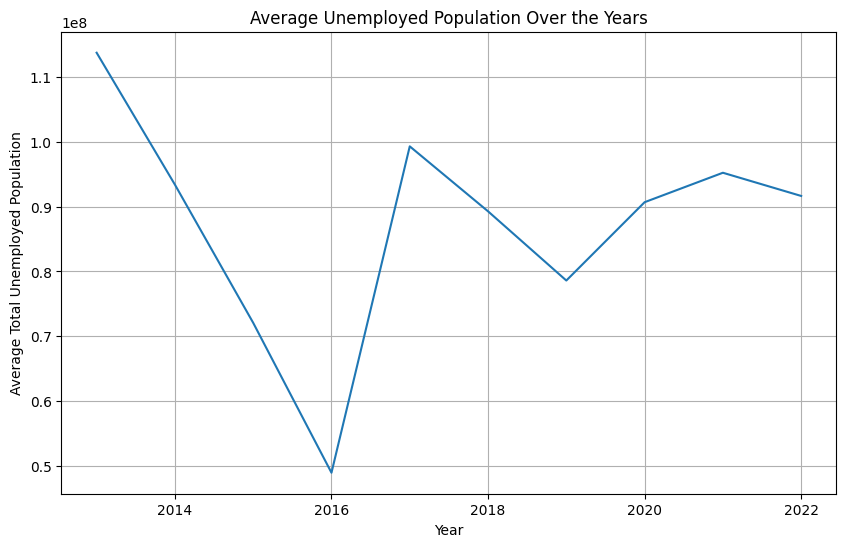

In [ ]:
# Calculate the average of totalunemployedp by Year
average_unemployedp = merged_df.groupby('Year')['totalunemployedp'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(average_unemployedp['Year'], average_unemployedp['totalunemployedp'])

plt.title('Average Unemployed Population Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Total Unemployed Population')
plt.grid(True)
plt.show()


In [ ]:
#check for stationarity of the data
from statsmodels.tsa.stattools import adfuller
results = adfuller(average_unemployedp ['totalunemployedp'])
print(results)
x = 'the data is non stationary' if results[1] >= 0.05 else 'the data is stationary'
print(f'The p-value is: {round(results[1],2)} hence {x}')

(-5.974351560857732, 1.9030855771116555e-07, 3, 6, {'1%': -5.354256481481482, '5%': -3.6462381481481483, '10%': -2.901197777777778}, 181.46035067615847)
The p-value is: 0.0 hence the data is stationary


**Since our data is now  stationary let us do prediction of the totalunemployed values**

**We first get the acf and pacf of our daily price to get the order of the model**

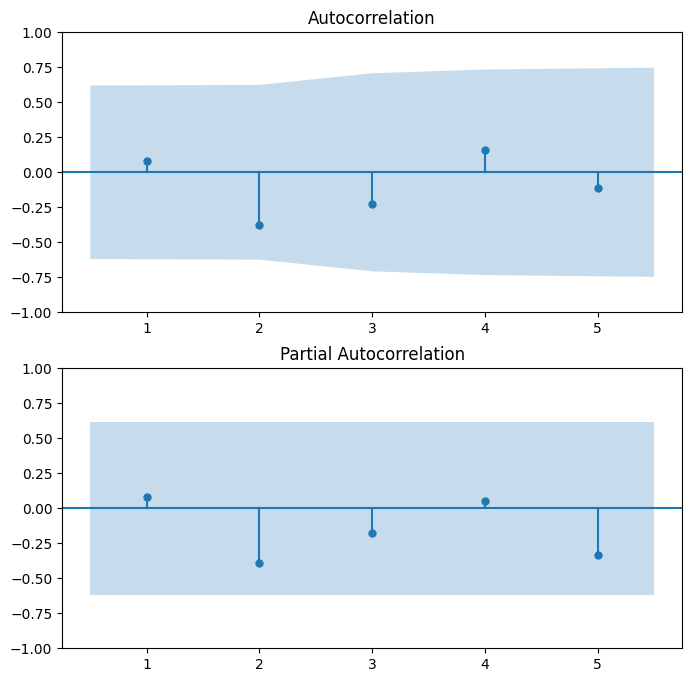

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,8))
# Make ACF plot
plot_acf(average_unemployedp ['totalunemployedp'].dropna(), lags=5, zero=False, ax=ax1,  linewidth=1.5)
# Make PACF plot
plot_pacf(average_unemployedp['totalunemployedp'].dropna(), lags=5, zero=False, ax=ax2,  linewidth=1.5)
plt.show()

**We cannot perform Timeseries analysis on this hence prediction is out**

Let's select some features to explore more.


In [ ]:
emp=merged_df[['observed value','Totalpop'	,'totalunemployedp']]
emp.head()

,observed value,Totalpop,totalunemployedp
0,3.396,28160542.0,9.563320e+07
1,1.746,28160542.0,4.916831e+07
2,5.198,28160542.0,1.463785e+08
3,2.679,28160542.0,7.544209e+07
4,3.598,27478249.0,9.886674e+07


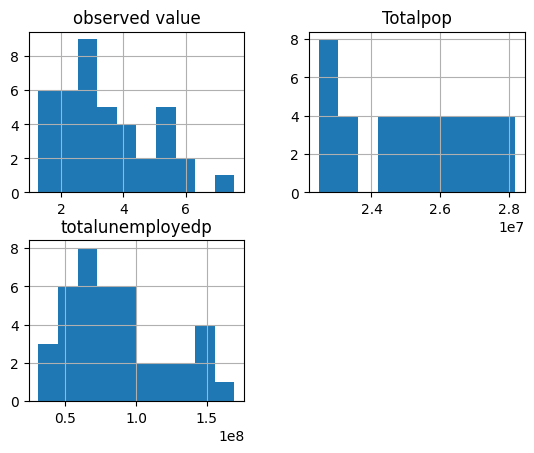

In [ ]:
viz=merged_df[['observed value','Totalpop'	,'totalunemployedp']]
viz.hist()
plt.show()

**2.Create a supervised or unsupervised learning model from the data in your dataset.**
# I decided to do simple linear regression

In [ ]:
msk = np.random.rand(len(merged_df)) < 0.8
train = emp[msk]
test = emp[~msk]

*emp[msk] selects rows from the DataFrame where the mask is True, creating the training set.<br>
emp[~msk] selects rows where the mask is False, creating the testing set.*

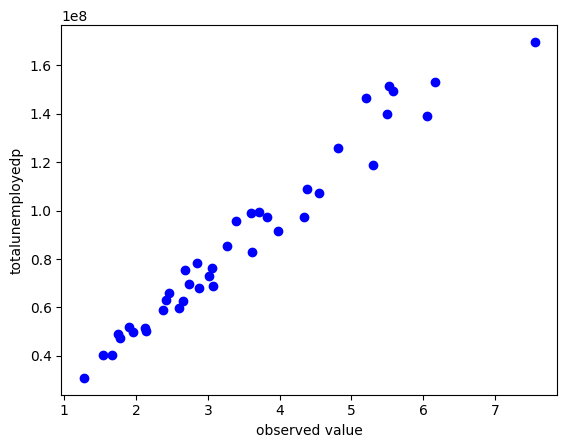

In [ ]:
plt.scatter(emp['observed value'], emp['totalunemployedp'], color='blue')
plt.xlabel("observed value")
plt.ylabel("totalunemployedp")
plt.show()

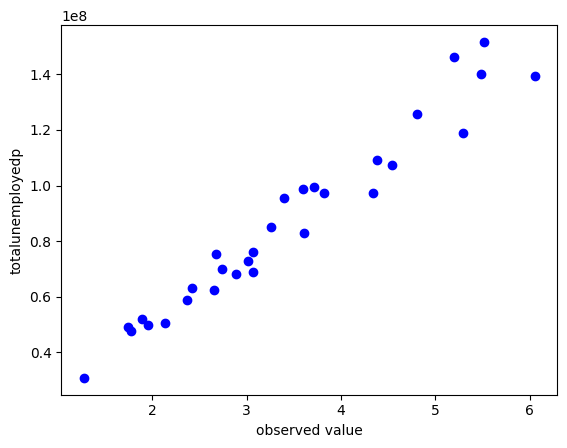

In [ ]:
#Scatter plot for the observed value and totalunemployedpouplation
plt.scatter(train['observed value'], train['totalunemployedp'], color='blue')
plt.xlabel("observed value")
plt.ylabel("totalunemployedp")
plt.show()

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['observed value']])
train_y = np.asanyarray(train[['totalunemployedp']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[24593754.42622627]]
Intercept:  [2184459.90774713]


Text(0, 0.5, 'totalunemployedp')

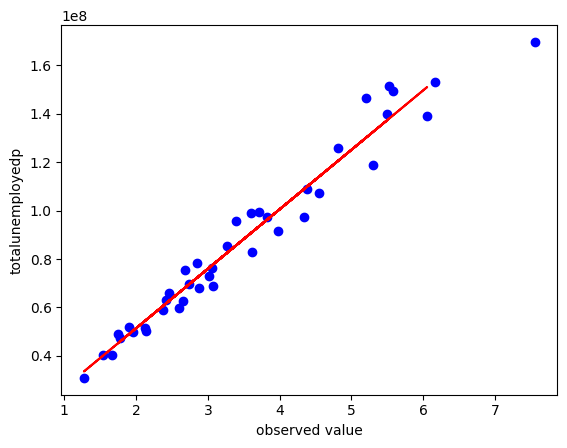

In [ ]:
#We can plot the fit line over the data:
plt.scatter(emp['observed value'], emp['totalunemployedp'], color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("observed value")
plt.ylabel("totalunemployedp")

#### Evaluation
We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:
* Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

* Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

* Root Mean Squared Error (RMSE).

* R-squared is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. *The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).*


In [ ]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['observed value']])
test_y = np.asanyarray(test[['totalunemployedp']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 5926547.95
Residual sum of squares (MSE): 61413004228103.92
R2-score: 0.97


**3. Create a function that accepts the raw data after it has been loaded and returns the cleaned-up data.**

In [ ]:
def process_data(unemployment_url, population_url):
    # Read datasets
    df = pd.read_csv(unemployment_url)
    population_df = pd.read_excel(population_url, engine='openpyxl')

    # Rename columns
    df = df.rename(columns={
        'ref_area.label': 'country',
        'indicator.label': 'indicator',
        'source.label': 'source',
        'sex.label': 'sex',
        'classif1.label': 'classification',
        'time': 'year',
        'obs_value': 'observed value',
        'obs_status.label': 'status'
    })

    # Filter data for Côte d'Ivoire
    df2 = df[df['country'] == "Côte d'Ivoire"]
    ivorycoast = df2[df2['classification'].isin(['Age (Youth, adults): 15-24', 'Age (Youth, adults): 25+'])]
    ivorycoast = ivorycoast[ivorycoast['sex'].isin(['Sex: Male','Sex: Female'])]
    ivorycoast['classification'] = ivorycoast['classification'].replace({'Age (Youth, adults): 25+':'25-35','Age (Youth, adults): 15-24':'15-24'}, regex=False).str.strip()
    ivorycoast['sex'] = ivorycoast['sex'].replace({'Sex: Male':'male','Sex: Female':'female'},regex=False).str.strip()
    ivorycoast_df= ivorycoast
    ivorycoast_df = ivorycoast_df.drop('status', axis=1)

    # Select only ivorycoast data from the population dataset
    ivorycoast_pop = population_df[population_df['Country Code'] == 'CIV']
    population_df= pd.DataFrame(ivorycoast_pop)

    # Perform pivoting
    finalp_df = population_df.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                        var_name='Year', value_name='Totalpop')
    finalp_df['Year'] = pd.to_numeric(finalp_df['Year'])

    # Rename columns to make merging easy
    ivorycoast_df.rename(columns={'country': 'Country Name', 'year':'Year'}, inplace=True)

    # Merge the dataframes on 'Country Name' and 'Year'
    merged_df = pd.merge(ivorycoast_df, finalp_df, on=[ 'Year'], how='inner')

    # Perform the multiplication and create the new column 'totalunemployedp'
    merged_df['totalunemployedp'] = merged_df['observed value'] * merged_df['Totalpop']
    merged_df.rename(columns={'Country Name_x': 'Country Name', 'Country Name_y':'Country Name'}, inplace=True)

    # Calculate the average of totalunemployedp by Year
    average_unemployedp = merged_df.groupby('Year')['totalunemployedp'].mean().reset_index()

    # Return the clean dataset
    return merged_df

# Example usage:
unemployment_url = "https://raw.githubusercontent.com/LubangaD/169240/main/unemployment.csv"
population_url = "https://github.com/LubangaD/169240/raw/main/Population.xlsx"
clean_merged_df = process_data(unemployment_url, population_url)
clean_merged_df.head()


,Country Name,indicator,source,sex,classification,Year,observed value,Country Name,Country Code,Indicator Name,Indicator Code,Totalpop,totalunemployedp
0,Côte d'Ivoire,Unemployment rate by sex and age -- ILO modell...,ILO - Modelled Estimates,male,15-24,2022,3.396,Cote d'Ivoire,CIV,"Population, total",SP.POP.TOTL,28160542.0,9.563320e+07
1,Côte d'Ivoire,Unemployment rate by sex and age -- ILO modell...,ILO - Modelled Estimates,male,25-35,2022,1.746,Cote d'Ivoire,CIV,"Population, total",SP.POP.TOTL,28160542.0,4.916831e+07
2,Côte d'Ivoire,Unemployment rate by sex and age -- ILO modell...,ILO - Modelled Estimates,female,15-24,2022,5.198,Cote d'Ivoire,CIV,"Population, total",SP.POP.TOTL,28160542.0,1.463785e+08
3,Côte d'Ivoire,Unemployment rate by sex and age -- ILO modell...,ILO - Modelled Estimates,female,25-35,2022,2.679,Cote d'Ivoire,CIV,"Population, total",SP.POP.TOTL,28160542.0,7.544209e+07
4,Côte d'Ivoire,Unemployment rate by sex and age -- ILO modell...,ILO - Modelled Estimates,male,15-24,2021,3.598,Cote d'Ivoire,CIV,"Population, total",SP.POP.TOTL,27478249.0,9.886674e+07


**4. Highlight the top two or three visualizations that are relevant to your dataset.**



1.   'Average Unemployed Population Over the Years'
2.   'Population Over the Years'
3.   'Plot to fit line over the data. In my simple linear regresion model'



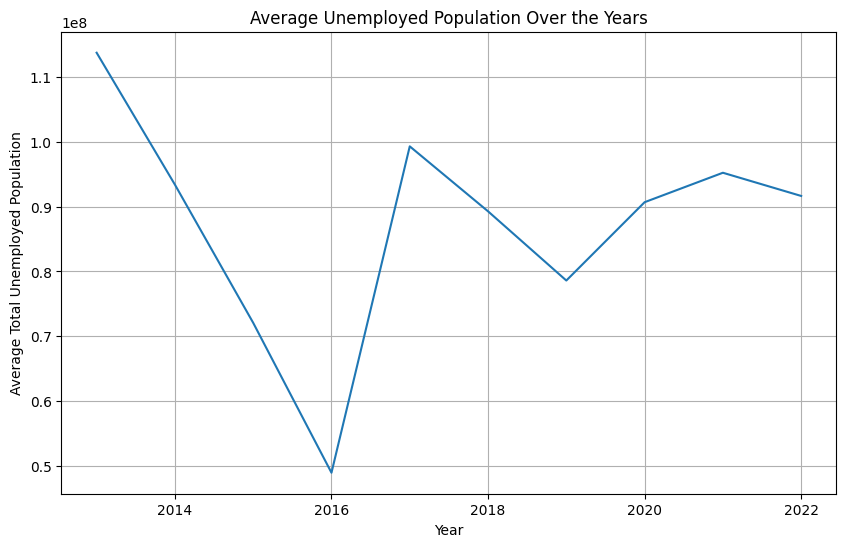

In [ ]:
# The average of totalunemployedp by Year
average_unemployedp = merged_df.groupby('Year')['totalunemployedp'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(average_unemployedp['Year'], average_unemployedp['totalunemployedp'])

plt.title('Average Unemployed Population Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Total Unemployed Population')
plt.grid(True)
plt.show()


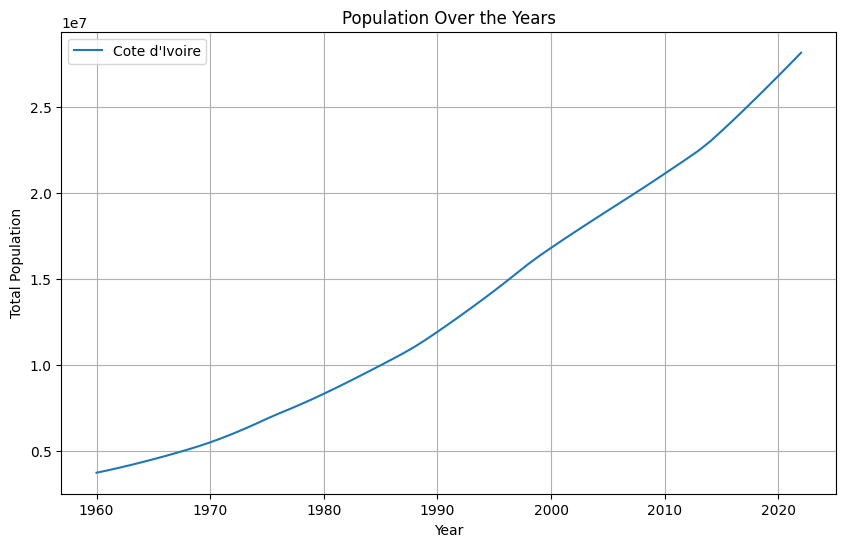

In [ ]:
#The population trend over time
# Convert 'Year' to numeric type
finalp_df['Year'] = pd.to_numeric(finalp_df['Year'])

# Plotting
plt.figure(figsize=(10, 6))
for country, data in finalp_df.groupby('Country Name'):
    plt.plot(data['Year'], data['Totalpop'], label=country)

plt.title('Population Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.legend()
plt.grid(True)
plt.show()

Text(0, 0.5, 'totalunemployedp')

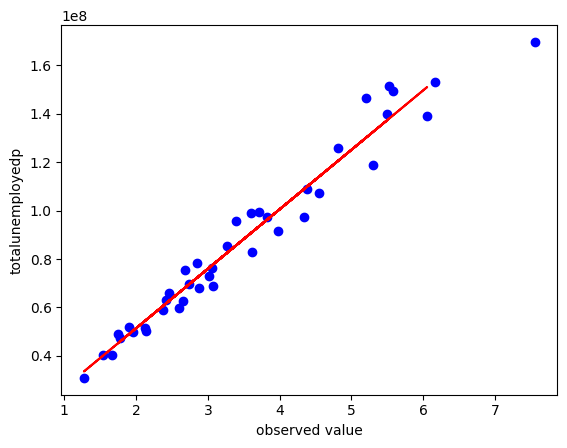

In [ ]:
#Plot to fit line over the data. In my simple linear regresion model'
plt.scatter(emp['observed value'], emp['totalunemployedp'], color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("observed value")
plt.ylabel("totalunemployedp")

**5. Summarize the insights gained and conclusions drawn (maximum three) from your dataset.**



**Unemployment Trends and Population Dynamics Over Time: A Summary**

The trends in unemployment rates and population dynamics offer valuable insights into the economic and social landscape of Côte d'Ivoire. Over recent years, noticeable patterns have emerged, indicating significant shifts and challenges:

1. **Unemployment Trends**:
   - From 2013 to 2016, Côte d'Ivoire experienced a notable surge in unemployment rates, reflecting economic fluctuations and potential challenges in employment opportunities during that period.
   - The years between 2018 and 2020 witnessed a substantial increase in unemployment levels globally, attributed largely to the impact of the COVID-19 pandemic. Côte d'Ivoire was not immune to this trend, experiencing a sharp rise in unemployment rates during this period.
   - However, from 2021 onwards, there has been a discernible downtrend in unemployment levels, suggesting potential recovery and stabilization in the labor market.

2. **Population Growth**:
   - Concurrently, Côte d'Ivoire has experienced consistent population growth over the years. The upward trajectory in population numbers signifies demographic changes and societal dynamics.
   - The steady increase in population contributes to the labor force pool, potentially influencing unemployment rates as more individuals enter the job market.

By examining the intertwined dynamics of unemployment trends and population growth, policymakers and stakeholders gain valuable insights into the challenges and opportunities within the Ivorian economy. Understanding these trends facilitates the development of targeted strategies aimed at promoting employment opportunities, fostering economic growth, and enhancing the well-being of the population.

